In [85]:
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.datasets import make_blobs
import pandas as pd
np.random.seed(678)
sns.set_style("whitegrid")
%matplotlib inline

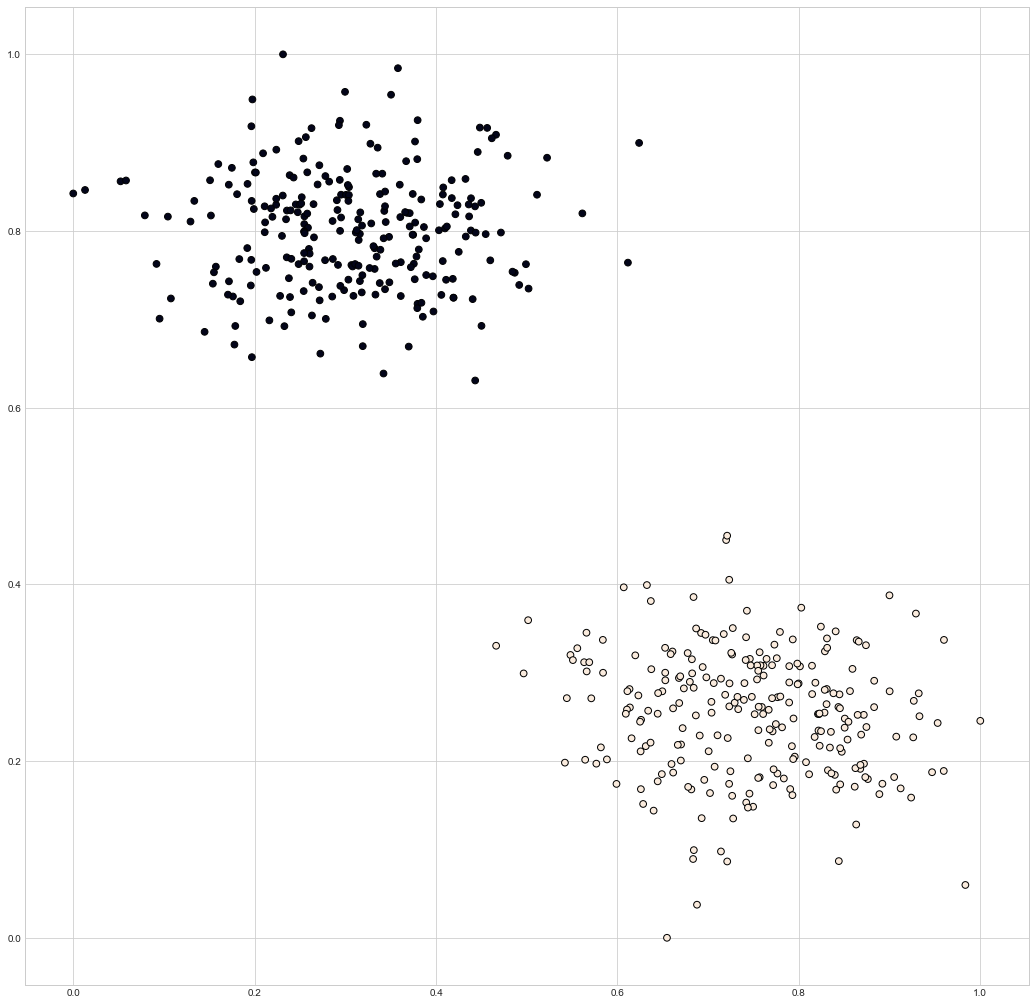

In [93]:
X1, Y1 = make_blobs(n_features=2, centers=2,n_samples=500,cluster_std=0.5,random_state=12)
# X1 = X1 + np.array([0,10])
X1[:,0] = (X1[:,0]-X1[:,0].min())/(X1[:,0].max()-X1[:,0].min())
X1[:,1] = (X1[:,1]-X1[:,1].min())/(X1[:,1].max()-X1[:,1].min())
plt.figure(figsize=(18, 18))
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,s=45, edgecolor='k')
plt.show()

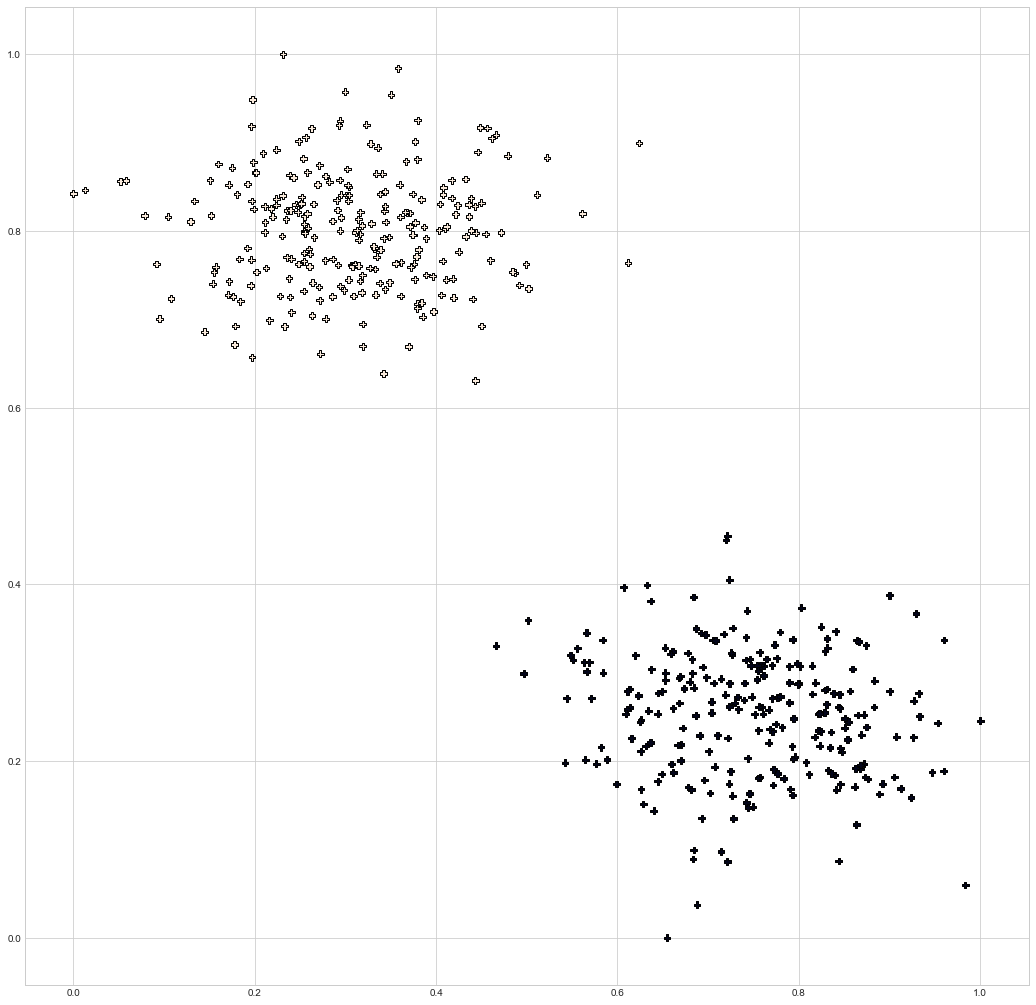

In [95]:
axix_x = np.array([1,0])
axix_y = np.array([0,1])
axis_matrix = np.vstack(([axix_x,axix_y]))
final = []
for xx in X1:
    resulted = xx.dot(axis_matrix)
    final.append(resulted)
final = np.asarray(final)
final_max = np.argmax(final,1)
plt.figure(figsize=(18, 18))
plt.scatter(X1[:, 0], X1[:, 1], marker='P', c=final_max,s=45, edgecolor='k')
plt.show()

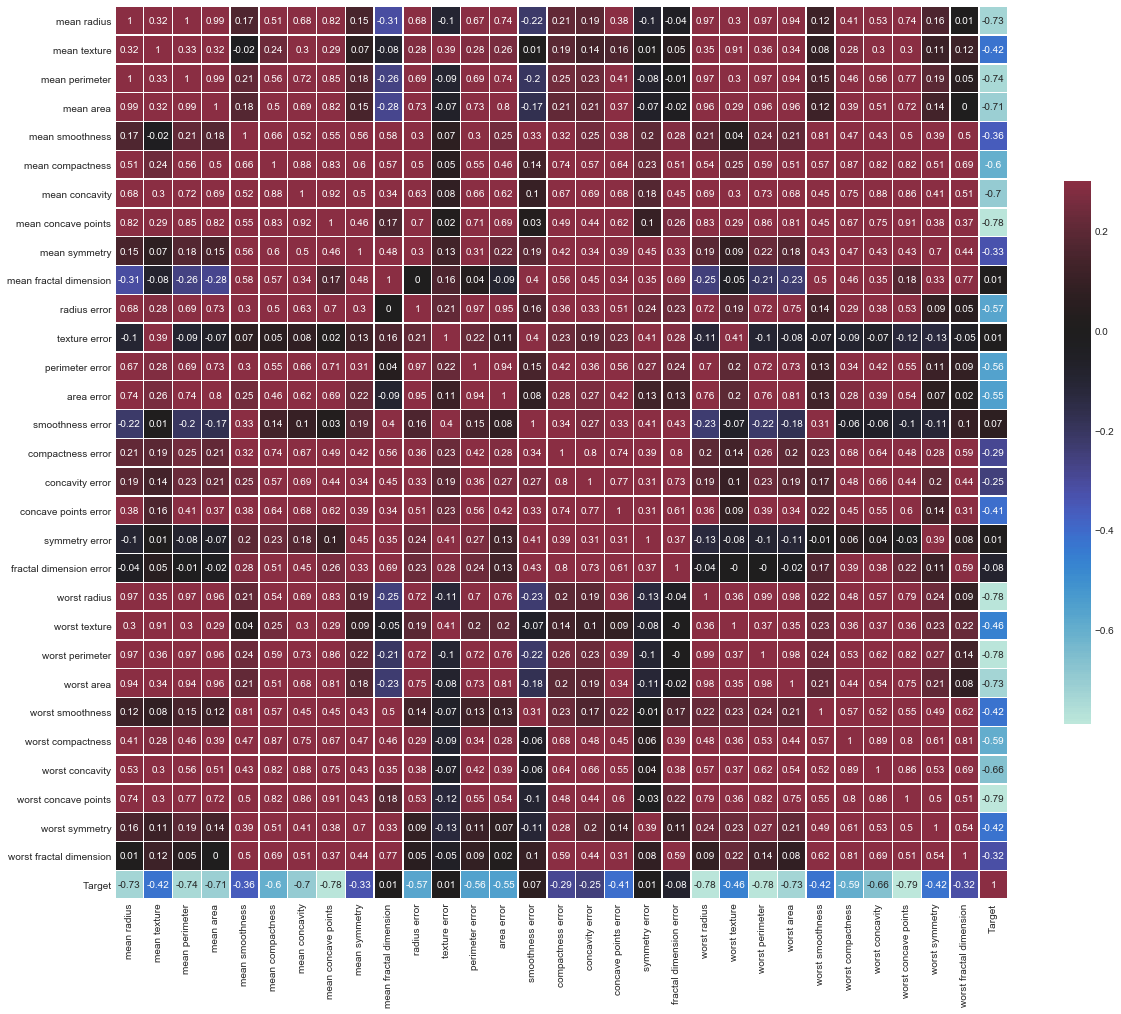

In [53]:
data = load_breast_cancer()
df_data = pd.DataFrame(data.data,columns=data.feature_names)
df_data['Target'] = data.target
plt.figure(figsize=(20, 20))
sns.heatmap(np.around(df_data.corr(),2),  annot=True, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [54]:
df_data.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'Target'],
      dtype='object')

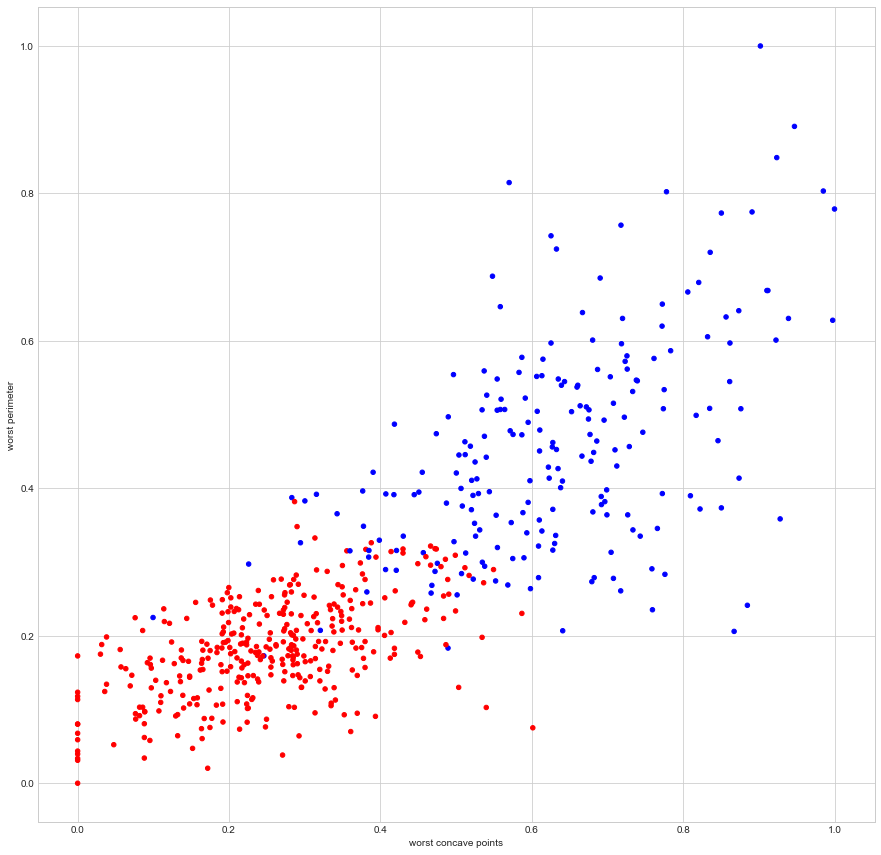

In [96]:
from matplotlib import cm
df_features = df_data[['worst concave points','worst perimeter']]
df_features = (df_features-df_features.min())/(df_features.max()-df_features.min())
df_targets = df_data[['Target']]
color_dict ={0:'blue',1:'red'}
plt.figure(figsize=(15, 15))
df_features.plot.scatter(x='worst concave points',y='worst perimeter',
                         c=df_targets['Target'].apply(lambda x: color_dict[x]),ax = plt.gca())
plt.show()

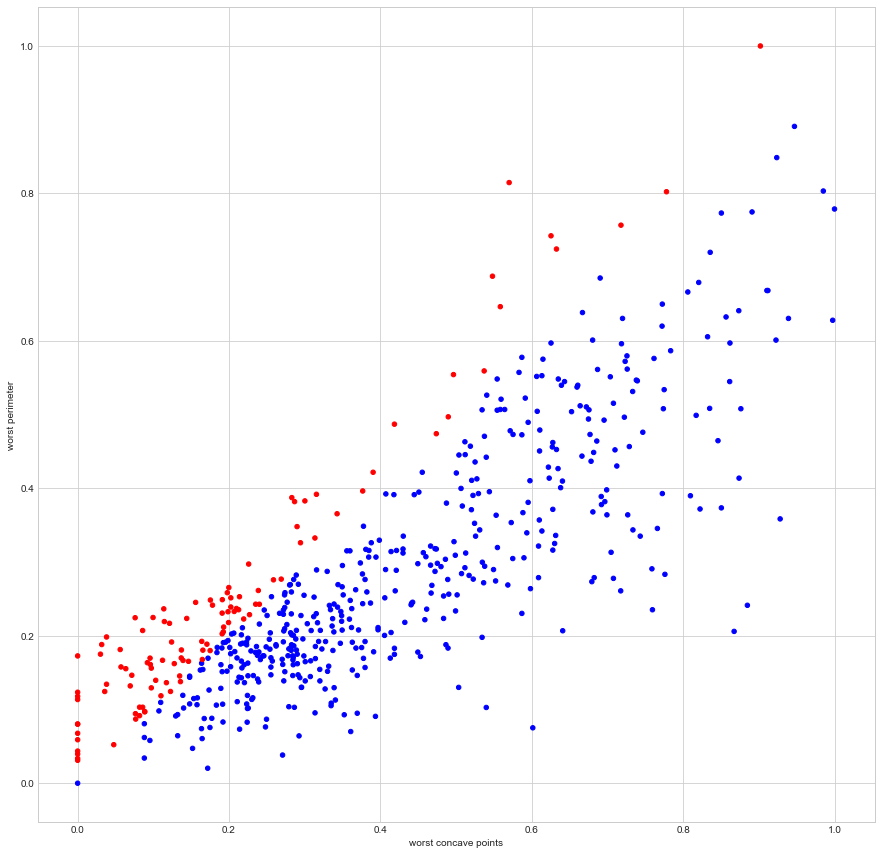

In [97]:
axix_x = np.array([1,0])
axix_y = np.array([0,1])
axis_matrix = np.vstack(([axix_x,axix_y]))
final = []
for xx in df_features.values:
    resulted = xx.dot(axis_matrix)
    final.append(np.abs(resulted))
    
final = np.asarray(final)
final_max = np.argmax(final,1)
plt.figure(figsize=(15, 15))
df_features.plot.scatter(x='worst concave points',y='worst perimeter',
                         c=[color_dict[x] for x in final_max ],ax = plt.gca())
plt.show()

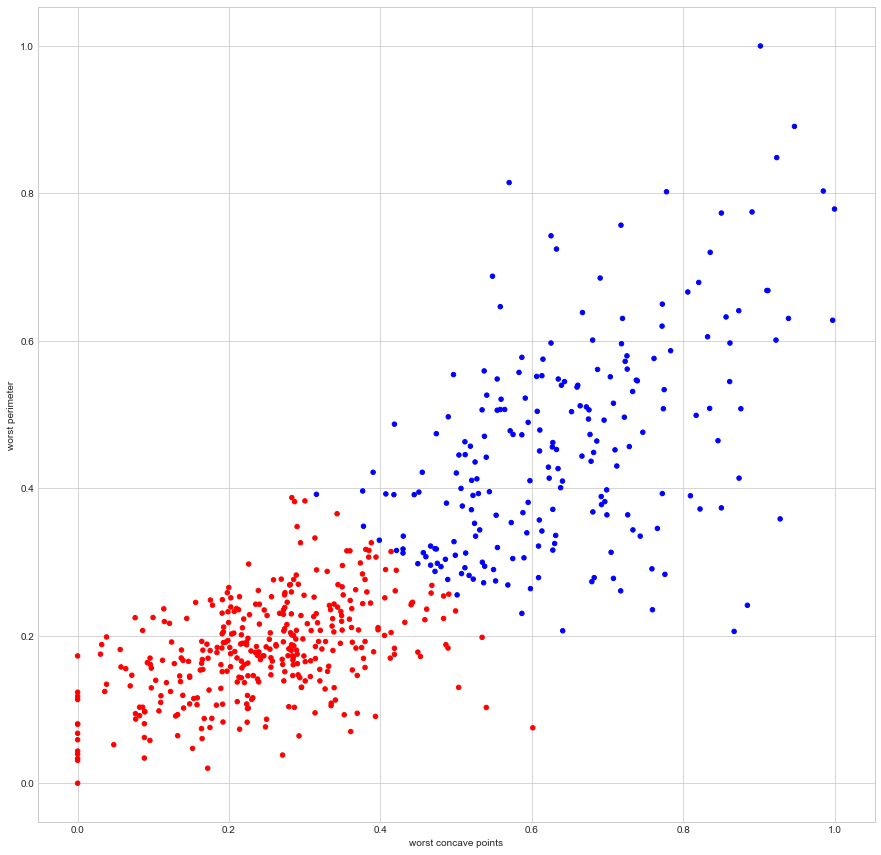

In [74]:
axix = np.array([0.3,0.4])
final = []
for xx in df_features.values:
    resulted = xx.dot(axix)
    if resulted < 0.25:
        final.append(1)
    else:
        final.append(0)
    
final = np.asarray(final)
plt.figure(figsize=(15, 15))
df_features.plot.scatter(x='worst concave points',y='worst perimeter',
                         c=[color_dict[x] for x in final ],ax = plt.gca())
plt.show()

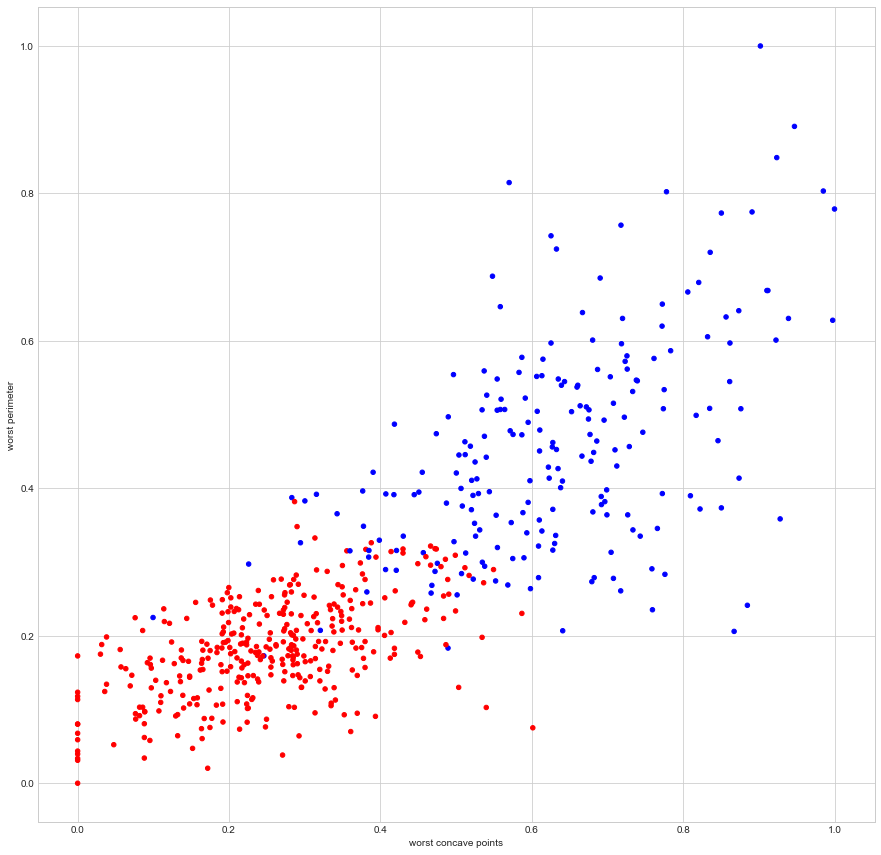

In [98]:
# ----- START FROM THE BEGINNING --------

df_features = df_data[['worst concave points','worst perimeter']]
df_features = (df_features-df_features.min())/(df_features.max()-df_features.min())
df_targets = df_data[['Target']]
color_dict ={0:'blue',1:'red'}
plt.figure(figsize=(15, 15))
df_features.plot.scatter(x='worst concave points',y='worst perimeter',
                         c=df_targets['Target'].apply(lambda x: color_dict[x]),ax = plt.gca())
plt.show()